In [98]:
import ccxt
import time
import sys
import numpy as np
import pandas as pd
import psutil
import datetime
import tqdm
from datetime import timedelta
#print(dir(ccxt.binance()))
print(psutil.virtual_memory())


svmem(total=17101479936, available=7977992192, percent=53.3, used=9123487744, free=7977992192)


In [99]:
binance = ccxt.binance()
for i in range(10):
    t = time.time()
    f1 = binance.fetchL2OrderBook('BTCUSDT')
    print(np.concatenate((f1['bids'][0:3], f1['asks'][0:3]), axis=None))
    #print(f1['bids'][0:3], f1['asks'][0:3])
    #print(time.time() - t)
binance.fetchL2OrderBook('BTCUSDT')

[2.448161e+04 8.116000e-02 2.448159e+04 1.575000e-02 2.448156e+04
 3.900000e-04 2.448217e+04 1.000000e-03 2.448225e+04 1.000000e-03
 2.448228e+04 7.010000e-03]
[2.448193e+04 5.000000e-04 2.448189e+04 5.000000e-02 2.448159e+04
 1.362000e-02 2.448227e+04 2.000000e-03 2.448228e+04 9.040000e-03
 2.448229e+04 1.099000e-02]
[2.448154e+04 1.000000e-05 2.448136e+04 5.004000e-02 2.448135e+04
 1.000000e-03 2.448197e+04 6.974000e-02 2.448198e+04 7.000000e-04
 2.448212e+04 8.720000e-03]
[2.448012e+04 4.000000e-02 2.448008e+04 6.500000e-04 2.447998e+04
 6.700000e-04 2.448133e+04 1.525700e-01 2.448152e+04 5.547000e-02
 2.448153e+04 1.889200e-01]
[2.447989e+04 1.623200e-01 2.447988e+04 7.000000e-04 2.447963e+04
 9.400000e-04 2.448053e+04 4.904000e-02 2.448060e+04 7.323000e-02
 2.448061e+04 4.590800e-01]
[2.447988e+04 7.000000e-04 2.447963e+04 9.400000e-04 2.447953e+04
 6.500000e-04 2.448043e+04 4.400000e-04 2.448044e+04 6.119000e-02
 2.448050e+04 6.360000e-03]
[2.447904e+04 7.000000e-04 2.447902e+04 

{'symbol': 'BTCUSDT',
 'bids': [[24477.83, 0.002],
  [24477.81, 0.001],
  [24477.78, 0.0007],
  [24477.6, 0.04],
  [24477.43, 0.002],
  [24477.36, 0.0007],
  [24477.33, 0.00065],
  [24477.32, 0.00069],
  [24477.29, 0.00095],
  [24477.26, 0.00065],
  [24477.25, 0.02397],
  [24477.2, 0.00634],
  [24477.15, 0.01153],
  [24477.04, 0.00067],
  [24477.01, 0.00141],
  [24477.0, 0.01225],
  [24476.98, 0.0117],
  [24476.97, 0.00632],
  [24476.94, 0.0007],
  [24476.79, 0.0608],
  [24476.78, 0.00065],
  [24476.67, 0.00918],
  [24476.57, 0.05719],
  [24476.52, 0.0007],
  [24476.47, 0.003],
  [24476.44, 0.025],
  [24476.39, 0.00055],
  [24476.36, 0.0075],
  [24476.3, 0.001],
  [24476.26, 0.01156],
  [24476.25, 0.66271],
  [24476.24, 0.46881],
  [24476.23, 0.06791],
  [24476.15, 0.04086],
  [24476.1, 0.0007],
  [24476.09, 0.0275],
  [24476.06, 0.02067],
  [24476.01, 0.02019],
  [24476.0, 0.001],
  [24475.97, 0.06808],
  [24475.93, 0.02941],
  [24475.9, 0.06056],
  [24475.8, 0.001],
  [24475.74, 0.04

In [100]:
binance = ccxt.binance()



def process_req(fetch, df_):
    
    ### A faster method for dict-to-dataframe-conversion:
    wanted_cols = ['Request Time', 'Response Time',    #added columns
                   'bid', 'ask', 'bidVolume', 'askVolume', 'close']                #columns from fetch
    cols = ['Request Time','Response Time',
            'Bid', 'Ask', 'BidVolume',  'AskVolume', 'Close']
    vals = [[fetch[k] for k in wanted_cols]]
    fetch_df = pd.DataFrame(vals, columns=cols, index=np.arange(1))
    

    df_ = pd.concat((df_, fetch_df), axis=0)
    return df_ 

    
def main(planned_freq=0.4):
    
    df = pd.DataFrame(columns=['Request Time','Response Time', 'Request Delay', 'Response Offset', 
                               'Close', 'BidVolume', 'AskVolume', 'Bid', 'Ask'],
                      index=np.arange(0))
    planned_req_time = pd.to_datetime(int(time.time())*10**9) \
                       + timedelta(hours=1, seconds=planned_freq) # +1 hour = timezone adjustment #  
    
    first_waiting_time = planned_req_time.value/(10**9) - (time.time() + 3600) #3600 = timezone adjustment
    if first_waiting_time < 0:
            first_waiting_time = 0.0
    time.sleep(first_waiting_time)

    for i in range(15):
        
        #print(planned_req_time)
        t = time.time()
        fetch = binance.fetch_ticker('BTCUSDT') #takes 0.25 to 0.9 seconds for a local device
        fetch['Response Time'] = datetime.datetime.fromtimestamp(fetch['timestamp']/1000) # Unix Time like 1666475429.232
        fetch['Request Time']      = planned_req_time  

                                    
                                        #delay_last + delay_recent
        df = process_req(fetch, df)
        t_after_req = pd.to_datetime(time.time()*10**9) + timedelta(hours=1) 

        while planned_req_time < t_after_req:          
            planned_req_time += timedelta(seconds=planned_freq)
            #print(planned_req_time)
            
        
        waiting_time = planned_req_time.value/(10**9) - (time.time() + 3600) #3600 = timezone adjustment

        if waiting_time < 0:
            waiting_time = 0.0
        time.sleep(waiting_time)

        

    #df.index.name = 'Req Time'
    #df.set_index('Req Time', inplace=True)
    #df_freq = str(int(planned_freq*1000)) + 'ms'
    #df = df.asfreq(df_freq)
    return df
f = main()
f



,Request Time,Response Time,Request Delay,Response Offset,Close,BidVolume,AskVolume,Bid,Ask
0,2023-02-19 21:50:34.400,2023-02-19 21:50:35.489,NaN,NaN,24475.68,0.00094,0.07000,24475.50,24476.09
0,2023-02-19 21:50:35.600,2023-02-19 21:50:35.811,NaN,NaN,24476.09,0.00042,0.00070,24475.69,24476.10
0,2023-02-19 21:50:36.000,2023-02-19 21:50:36.239,NaN,NaN,24475.40,0.00200,0.07000,24475.46,24475.85
0,2023-02-19 21:50:36.400,2023-02-19 21:50:36.444,NaN,NaN,24475.47,0.00065,0.00070,24475.68,24476.10
0,2023-02-19 21:50:36.800,2023-02-19 21:50:37.045,NaN,NaN,24476.48,0.00070,0.04000,24475.68,24476.47
0,2023-02-19 21:50:37.200,2023-02-19 21:50:37.450,NaN,NaN,24476.45,0.53716,0.11009,24475.69,24476.46
0,2023-02-19 21:50:37.600,2023-02-19 21:50:37.790,NaN,NaN,24476.59,0.16176,0.00084,24476.11,24476.44
0,2023-02-19 21:50:38.000,2023-02-19 21:50:38.254,NaN,NaN,24476.61,0.22869,0.00050,24476.12,24476.70
0,2023-02-19 21:50:38.400,2023-02-19 21:50:38.591,NaN,NaN,24476.66,0.06039,0.00065,24476.18,24476.78
0,2023-02-19 21:50:38.800,2023-02-19 21:50:39.038,NaN,NaN,24476.52,0.00021,0.11072,24476.52,24477.30


In [140]:
binance.fetch_ticker('BTCUSDT')

{'symbol': 'BTC/USDT',
 'timestamp': 1675520081598,
 'datetime': '2023-02-04T14:14:41.598Z',
 'high': 23715.7,
 'low': 23204.62,
 'bid': 23462.17,
 'bidVolume': 0.08786,
 'ask': 23463.04,
 'askVolume': 0.01184,
 'vwap': 23444.80618434,
 'open': 23336.66,
 'close': 23463.04,
 'last': 23463.04,
 'previousClose': '23336.54000000',
 'change': 126.38,
 'percentage': 0.542,
 'average': 23399.85,
 'baseVolume': 263519.75209,
 'quoteVolume': 6178169513.495486,
 'info': {'symbol': 'BTCUSDT',
  'priceChange': '126.38000000',
  'priceChangePercent': '0.542',
  'weightedAvgPrice': '23444.80618434',
  'prevClosePrice': '23336.54000000',
  'lastPrice': '23463.04000000',
  'lastQty': '0.01156000',
  'bidPrice': '23462.17000000',
  'bidQty': '0.08786000',
  'askPrice': '23463.04000000',
  'askQty': '0.01184000',
  'openPrice': '23336.66000000',
  'highPrice': '23715.70000000',
  'lowPrice': '23204.62000000',
  'volume': '263519.75209000',
  'quoteVolume': '6178169513.49548620',
  'openTime': '16754336

In [99]:
cl = HFT_Dataset_Fetcher('BTC', 'USDT', 'data', 0.5, 100)
cl.fetch_and_save()

In [100]:
cl.df

,Response Time,Bid,Ask,BidVolume,AskVolume,Close,Request Delay,Response Offset
Request Time,,,,,,,,
2023-02-10 23:10:53.500,2023-02-10 23:10:54.320,21558.93,21559.79,0.01210,0.00047,21560.28,0.820,NaN
2023-02-10 23:10:55.000,2023-02-10 23:10:55.060,21558.92,21559.85,0.00047,0.03016,21559.85,0.060,0.240
2023-02-10 23:10:55.500,2023-02-10 23:10:55.533,21558.84,21559.71,0.00314,0.02416,21558.84,0.033,-0.027
2023-02-10 23:10:56.000,2023-02-10 23:10:56.052,21558.57,21558.72,0.00350,0.00764,21558.06,0.052,0.019
2023-02-10 23:10:56.500,2023-02-10 23:10:56.518,21558.20,21558.21,0.06561,0.00047,21558.21,0.018,-0.034
...,...,...,...,...,...,...,...,...
2023-02-10 23:11:42.000,2023-02-10 23:11:42.039,21555.33,21555.94,0.02684,0.01071,21555.91,0.039,0.037
2023-02-10 23:11:42.500,2023-02-10 23:11:42.471,21555.35,21556.08,0.00047,0.00674,21556.08,-0.029,-0.068
2023-02-10 23:11:43.000,2023-02-10 23:11:43.037,21556.25,21557.64,0.07000,0.04176,21557.21,0.037,0.066


In [96]:
import concurrent
import requests

binance = ccxt.binance()
ticker = 'BTCUSDT'

#binance --> self.binance
#ticker --> self.ticker

def __fetch_function(id_): #requires ~ 0.25 seconds per iteration (oftentimes up to 0.9 s)
    if id_ == 0:
        return binance.fetch_ticker(ticker) 
    elif id_ == 1:
        return binance.fetchL2OrderBook(ticker)

for i in range(10):
    t = time.time()
    with concurrent.futures.ThreadPoolExecutor() as executor:
        #using 2 instead of 1 fetch will increase th fetch time by ~60 ms
        res = [executor.submit(__fetch_function, id_) for id_ in [0,0]] 
        print(res[0].result()['timestamp'], res[1].result()['timestamp'])
        
        concurrent.futures.wait(res)
    print(time.time() -t)
print(res[0].result()['timestamp'], res[1].result()['timestamp'])

1676066697629 1676066698536
1.659034252166748
1676066698788 1676066698848
0.3056337833404541
1676066699100 1676066699151
0.302532434463501
1676066699340 1676066699441
0.30423974990844727
1676066699715 1676066699762
0.306290864944458
1676066700011 1676066700051
0.31329894065856934
1676066700333 1676066700370
0.31377315521240234
1676066700640 1676066700695
0.30448007583618164
1676066700937 1676066701663
0.9828648567199707
1676066701928 1676066701979
0.3152611255645752
1676066701928 1676066701979


In [95]:
pd.to_datetime(res[0].result()['timestamp']*10**6)

Timestamp('2023-02-10 22:02:27.737000')

<AxesSubplot:xlabel='Request Time'>

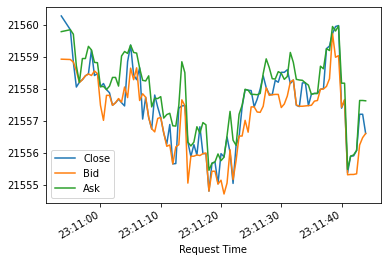

In [101]:
cl.df[['Close', 'Bid', 'Ask']].plot()

In [306]:
class HFT_Dataset_Fetcher:
    
    def __init__(self,
                 coin            : str,
                 stable_coin     : str,
                 save_dir        : str,  # like 'data/Crypto_data'
                 fetch_freq      = 0.5,  # in s; works for 0.3 to 1
                 fetched_samples = 10):

        self.coin            = coin
        self.stable_coin     = stable_coin
        self.ticker          = coin + stable_coin #'BTCUSDT'
        self.fetch_freq      = fetch_freq   
        self.fetched_samples = fetched_samples        
        self.save_dir        = save_dir       
        self.binance = ccxt.binance()

        if self.fetch_freq > 5 or self.fetch_freq < 0.01:
            raise(f'The value of fetch_freq={self.fetch_freq} should be between 0.01 and 5 seconds.')

    
    def fetch_and_save(self):  

        ### Preparing pre-fetching state
#         fetch_cols = ['Request Time', 'Response Time',                            # <-- newly added columns
#                       'bid', 'ask', 'bidVolume', 'askVolume', 'close']       # <-- original columns from fetch

        #VWM: Weighted Mean with Volume as weights
        cols = ['Request Time', 'Response Delay','Bid_Ask_Spread', 
                'Sum_BV_2',  'Sum_BV_3' ,                 # Sum of volumes
                'Sum_AV_2',  'Sum_AV_3' ,                 
                'VWM_Bid_2', 'VWM_Bid_3',                 # Weighted mean (weighted by volume)
                'VWM_Ask_2', 'VWM_Ask_3',
                'Bid_1', 'BidVolume_1', 'Bid_2', 'BidVolume_2', 'Bid_3', 'BidVolume_3',
                'Ask_1', 'AskVolume_1', 'Ask_2', 'AskVolume_2', 'Ask_3', 'AskVolume_3']
    
        self.df = pd.DataFrame(columns=cols, index=np.arange(0))

        ### Get time of next timestep start
        planned_req_time = pd.to_datetime(int(time.time())*10**9) + timedelta(hours=1, seconds=self.fetch_freq) # +1 hour = timezone adjustment #  

        ### Wait until the next timestep start
        first_waiting_time = planned_req_time.value/(10**9) - (time.time() + 3600) # 3600 = timezone adjustment
        if first_waiting_time < 0:
                first_waiting_time = 0.0
        time.sleep(first_waiting_time)

        ### Fetch at every time of the frequency self.fetch_freq
        for _ in tqdm.tqdm(np.arange(self.fetched_samples), desc='Fetching samples'):
            
            t = time.time()
            fetch = self.binance.fetchL2OrderBook(self.ticker) #requires ~ 0.25 seconds per iteration (oftentimes up to 0.9 s)
            
            response_delay = time.time() - t
            ba_spread      = fetch['asks'][0][0] - fetch['bids'][0][0]
            
            t = time.time()
            
            #Feature Engineering: just 1-3ms
            data_arr = np.hstack(
                             (np.array([planned_req_time, response_delay, ba_spread]),
                              np.array([np.sum(np.array(fetch['bids'])[0:i, 1])
                                            for i in [2,3]]),
                              np.array([np.sum(np.array(fetch['asks'])[0:i, 1])
                                            for i in [2,3]]),

                              np.array([np.sum(np.prod(fetch['bids'][0:i], axis=1))      # VWM_asks 
                                       /np.sum(np.array(fetch['bids'])[0:i, 1])
                                            for i in [2,3]]),
                              np.array([np.sum(np.prod(fetch['asks'][0:i], axis=1))      # VWM_asks
                                       /np.sum(np.array(fetch['asks'])[0:i, 1])
                                            for i in [2,3]]),
                              np.concatenate((fetch['bids'][0:3], fetch['asks'][0:3]), axis=None))
                            )
            print(time.time() -t)
            fetch_df = pd.DataFrame([data_arr], columns=cols, index=np.arange(1))

            self.df = pd.concat((self.df, fetch_df), axis=0)

            ### Get time of next timestep start
            t_after_req = pd.to_datetime(time.time()*10**9) + timedelta(hours=1) 
            while planned_req_time < t_after_req:          
                planned_req_time += timedelta(seconds=self.fetch_freq)

            ### Wait until the next timestep start
            waiting_time = planned_req_time.value/(10**9) - (time.time() + 3600) #3600 = timezone adjustment
            if waiting_time < 0:
                waiting_time = 0.0
            time.sleep(waiting_time)


        self.df.set_index('Request Time', inplace=True)

        ### Save df
        self._save_df()

    def _save_df(self): #Only csv saving as of small size and good readability
        date = str(self.df.index[0]).replace(':', 'h')[:16]
        self.df.to_csv(f'{self.save_dir}/{self.ticker}_{str(self.fetch_freq*1000)[:-2]}ms_{len(self.df)}_samples_since_{date}.csv') 
        #'Crypto data/BTCUSDT_1000ms_1200_samples_since_2023-02-09 18h56.csv'


In [307]:
cl = HFT_Dataset_Fetcher('BTC', 'USDT', 'data', 0.5, 10)
cl.fetch_and_save()

Fetching samples:   0%|                                                                         | 0/10 [00:00<?, ?it/s]

0.0009996891021728516


Fetching samples:  10%|██████▌                                                          | 1/10 [00:01<00:13,  1.49s/it]

0.0009932518005371094


Fetching samples:  20%|█████████████                                                    | 2/10 [00:01<00:07,  1.10it/s]

0.0017402172088623047


Fetching samples:  30%|███████████████████▌                                             | 3/10 [00:02<00:05,  1.39it/s]

0.0


Fetching samples:  40%|██████████████████████████                                       | 4/10 [00:02<00:03,  1.57it/s]

0.0009870529174804688


Fetching samples:  60%|███████████████████████████████████████                          | 6/10 [00:04<00:02,  1.38it/s]

0.0009996891021728516


Fetching samples:  70%|█████████████████████████████████████████████▌                   | 7/10 [00:05<00:02,  1.23it/s]

0.0019996166229248047
0.0010001659393310547


Fetching samples:  80%|████████████████████████████████████████████████████             | 8/10 [00:05<00:01,  1.40it/s]

0.0009887218475341797


Fetching samples:  90%|██████████████████████████████████████████████████████████▌      | 9/10 [00:06<00:00,  1.53it/s]

0.002991914749145508


Fetching samples: 100%|████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.43it/s]


In [ ]:
## Total features:
        # 16 base features +
        # 10 engieered features + 
        # 7 environment state features 
        # ___________
        # = 33 features

## This means a longer pre-process time: 
        # Separate thread
          # 250/20 ms req time + 
          # 3 ms feature engineering +
            
        # Main thread
          # TODOxx ms environment step time
          # TODOxx environment state feature engineering
          # TODOxx model excecution time (NN)
        # __________
        # 300/50 ms freq possible

## This also means more needed train data:
        # for a PPO with 3*33 neurons:
        # ~ 10000 or more samples needed 
        # ~ 2h recording time for 500ms freq)
        
# TODO finish experiment!!, class diagram!!!!, frontend!!!!!!!!!!

In [33]:
import pandas as pd
import numpy as np
from urllib.error import  HTTPError
import time
import datetime
from datetime import timedelta
import warnings
import ccxt
from ccxt.base.errors import RateLimitExceeded, BadSymbol
import tqdm
import threading

warnings.filterwarnings('ignore')

class Scalping_Dataset_Fetcher:
    
    def __init__(self,
                 stable_coin : str,
                 start_date  : str,
                 end_date    : str,
                 save_dir    : str,
                 fill_missing_data_with_other_exchanges = True):

        # Coins all with data from 2020 to now with only small data gaps
        # Defining these hard coded for the user to avoid datagaps and confusion on datagaps
            # Just providing flawless datasets for the user
            # Run self.coins.append/remove(['SHIB']) to add or remove coins
            
        self._coin       = None
        self._ticker     = None  # function variables
        
        self.coins       = ['ADA','ALGO','ATOM','BNB','BTC','EOS',           
                            'ETH','ETC', 'NEO','ONT','LTC','VET', 'ZEC']     
                                                                   
        self.stable_coin  = stable_coin
        self.freq         = '1m'               # 1 min --> can be upsampled to lower frequencies
        self.freq_pd      = '1T'
                                              # 1 s possible but a lot more space required
                                                # would be more like high frequency trading but without bid ask featueres
        self.save_dir     = save_dir           # like 'data/Crypto_data'
        self.start_date   = start_date[0:7]    #'2020-02-01' --> '2020-01' 
        self.end_date     = end_date[0:7]
        
        
        self.fetch_thread = threading.Thread(target = self.fetch_all, args = ())
        self.thread_flag  = 'not started'
        self.fill_missing_data_with_other_exchanges = fill_missing_data_with_other_exchanges
        start_year = int(start_date[0:4])
        end_year   = int(end_date[0:4])
        years_between = end_year - start_year
        months = [f'{start_year + i}-{str(0) if j+1 < 10 else ""}{j+1}' #['2020-01', '2020-02', ..., '2022-11', '2022-12']
                    for i in range(years_between + 1) 
                        for j in range(12)]
        
        self.months = months[months.index(self.start_date):months.index(self.end_date)+1] 
                                                #remove months before start and after end date:
                                                  # --> ['2020-02', '2020-03', ..., '2022-05']
                                         
    def add_coin_to_coins(self, coin):
        self.coins.append(coin)
        
    def clear_coins(self, coin):
        self.coins = []
                                                  
    def start_threaded_fetch_all(self):
        # Function called by fetch_all
        if self.thread_flag == 'killed':
            
            # A thread can only be started once, thus creating a new one for every function call.
            self.fetch_thread = threading.Thread(target = self.fetch_all, args = ())
            
        self.fetch_thread.start()
        self.thread_flag = 'started'

    def stop_threaded_fetch_all(self):
        if self.thread_flag != 'not started':
            self.thread_flag = 'stop'      # Stop the for loop inside fetch_all
            self.fetch_thread.join()       # Wait until the thread is killed
            self.thread_flag = 'killed'
        
    def fetch_all(self):
        for c in tqdm.tqdm(self.coins[:], desc=f'Downloading for all tickers'):
            self._coin = c
            if self.thread_flag == 'stop':
                break
            self.__fetch_and_save_single_coin()


    def __fetch_and_save_single_coin(self):
        # No threading for this function
        self._ticker = self._coin + self.stable_coin
        self.df = pd.DataFrame([])
        for i in tqdm.tqdm(self.months, desc=f'Download ticker months of {self._ticker}'):
            
            url = f'https://data.binance.vision/data/spot/monthly/klines/{self._ticker}/{self.freq}/{self._ticker}-{self.freq}-{i}.zip'        
            http_error = False
            
            try:
                df_fetched = pd.read_csv(url, header=None)

            except HTTPError as e:   # Binance keeps just 2 years of historical data
                print(f'No data available for {self._ticker} at {i}. Fetching no data for this month.')
                http_error = True
                
            if not http_error:
                if len(self.df) > 1:      
                    self.df = pd.concat([self.df, df_fetched])
                elif len(self.df) == 0:
                    self.df = df_fetched

        if len(self.df) != 0:
            self.__adjust_fetched_binance_dataframe()
            if self.fill_missing_data_with_other_exchanges:
                self._fill_missing_data_with_other_exchanges()
            self.__save_df()
        else:
            print(f'There is not any data to save for {self._ticker}. Skipping the saving')
            
    def update_datasets(self):
        
        #for c in self.coins:
        pass
        #TODO
        
        #get last months date by filename
        # set month from this date till now

    def __adjust_fetched_binance_dataframe(self):
        fetched_columns = ['Time', 'Open', 'High','Low','Close','Volume',
                           'Close Time', 'Quote Asset Vol', 'Num Trades',
                           'Taker Buy Base', 'Taker Buy Quote', 'Ignore Column']

        dropped_columns = ['Close Time', 'Quote Asset Vol', 'Taker Buy Base', 
                           'Taker Buy Quote', 'Ignore Column', 'Num Trades']

        print(len(self.df))
        self.df.columns = fetched_columns
        self.df.drop(dropped_columns, inplace=True, axis=1)
        self.df['Time'] = pd.to_datetime(self.df['Time'], unit='ms')
        self.df.set_index('Time', inplace=True)
        self.df = self.df.asfreq(self.freq_pd) #restore index where there are missing values

    def _fill_missing_data_with_other_exchanges(self): 
        # Takes some extra time with limit of 1000 tuples per minute.
        # If Kucoin also does not have replacement data, the last available values are used.

        def __adjust_ccxt_output(data):
            columns = ['Time', 'Open', 'High', 'Low', 'Close','Volume']
            data = pd.DataFrame(data, columns=columns)
            data.set_index(pd.to_datetime(df['Time'], unit='ms'), inplace=True)
            data.drop(['Time'], inplace=True,axis=1)
            data = data.asfreq(self.freq_pd)
            return data

        #0 has to be imputed for volume as it is different to the binance volume. 
        self.df['Volume'].fillna(value=0, inplace=True)
        sym = self._coin + '/' + self.stable_coin      
        exchange = getattr(ccxt, 'kucoin') # kucoin: Most reliable exchange with very few gaps and good request time
        exchange = exchange()
        
        print(len(self.df))

        while self.df['Open'].isna().any():
            # Find first missing value occurence: 
            t1 = self.df.loc[df['Open'].isnull()].index[0] + timedelta(hours=1)# +1h = timezone adjustment       
            t1_unix = int((time.mktime(t1.timetuple()))* 1000) # to unix time
            # Request since this first missing value occurrence:
            try:
                replacement_data = exchange.fetch_ohlcv(symbol=sym, timeframe='1m', since=t1_unix, limit=1000)
                replacement_data = __adjust_ccxt_output(replacement_data)
            except (RateLimitExceeded, BadSymbol) as e:
                print(e)  
            # Replace with the requested data:
            if len(replacement_data) != 0:  # Empty data: often request limit reached; rarely no data for symbol or other error
                                            # Warning: Can cause an infinite looping.
                self.df.fillna(value=replacement_data, inplace=True) # Fills a dataframe with other dataframe values at matching indexes
        print(len(self.df))
        # If finally no data fill nan values with last data: 
        self.df.fillna(method='ffill', inplace=True) 


    def __save_df(self): #Only csv saving as of small size and good readability
        self.df.to_csv(f'{self.save_dir}/{self._ticker}_1m_{self.months[0]}-{self.months[-1]}.csv') 
        #'Crypto data/BTCUSDT_1m_2020-01-2022-06.csv'

class Live_HFT_Sample_Fetcher:
   # Fetches a sample every in a frequency on a separate thread
   # --> returns the current recent sample on demand

    def __init__(self,
                 coin            : str,
                 stable_coin     : str,
                 fetch_freq      = 0.5,  # in s; works for 0.3 to 1
                 fetched_samples = 10):

        self.coin            = coin
        self.stable_coin     = stable_coin
        self.ticker          = coin + stable_coin #'BTCUSDT'
        self.fetch_freq      = fetch_freq         
        self.binance = ccxt.binance()

        if self.fetch_freq > 2 or self.fetch_freq < 0.01:
            raise(f'The value of fetch_freq={self.fetch_freq} should be between 0.01 and 2 seconds.')
            
        self.live_fetch_thread =  threading.Thread(target = self.__threaded_fetching, args = ())
        self.last_live_fetch   =  None
        self.fetch_is_updated  = False
        self.thread_should_run = False

    def start_threaded_fetching(self):
        if self.thread_should_run:   # If thread is started a second time, stop it
            self.stop_threaded_fetching()
            print('tried to stop live fetching') 
            
            # A thread can only be started once, thus creating a new one for every function call.
            self.live_fetch_thread =  threading.Thread(target = self.__threaded_fetching, args = ())

        self.thread_should_run = True
        self.live_fetch_thread.start()
        
    def stop_threaded_fetching(self):
        print('tried to stop live fetching 2')
        self.thread_should_run = False # causes the function __threaded_fetching to stop looping finishing the thread
        self.live_fetch_thread.join()  # Waits as long as it needs to kill a thread
        self.thread_should_run = True
        
    def __live_hft_feature_engineering(self, fetch_env_arr, fetch):
        # An orderbook fetch and derives features from it. 
        # Some features are easier calculated while fetching: These single features are passed via fetch_env_arr

        #Feature Engineering: just 1-3ms
        return  np.hstack(
                        (fetch_env_arr,
                         np.array([np.sum(np.array(fetch['bids'])[0:i, 1])          # Sum of volume
                                    for i in [2,3]]),
                         np.array([np.sum(np.array(fetch['asks'])[0:i, 1])
                                    for i in [2,3]]),

                         np.array([np.sum(np.prod(fetch['bids'][0:i], axis=1))      # VWM_asks (Volume Weighted Mean Bid price)
                                /np.sum(np.array(fetch['bids'])[0:i, 1])
                                    for i in [2,3]]),
                         np.array([np.sum(np.prod(fetch['asks'][0:i], axis=1))      # VWM_asks
                                /np.sum(np.array(fetch['asks'])[0:i, 1])
                                    for i in [2,3]]),
                         np.concatenate((fetch['bids'][0:3], fetch['asks'][0:3]), axis=None))
                        )
        
    def __threaded_fetching(self):
        planned_req_time = pd.to_datetime(int(time.time())*10**9) + timedelta(hours=1, seconds=self.fetch_freq) # +1 hour = timezone adjustment #

        ### Wait until the next timestep start
        first_waiting_time = planned_req_time.value/(10**9) - (time.time() + 3600) # 3600 = timezone adjustment
        if first_waiting_time < 0:
                first_waiting_time = 0.0
        time.sleep(first_waiting_time)       
        
        while self.thread_should_run:
            
            t = time.time()
            fetch = self.binance.fetchL2OrderBook(self.ticker) #requires ~ 0.25 seconds per iteration (oftentimes up to 0.9 s)
            
            response_delay = time.time() - t
            ba_spread      = fetch['asks'][0][0] - fetch['bids'][0][0]
            data_arr       = np.array([planned_req_time, response_delay, ba_spread])

            #Feature Engineering: just 1-3ms
            self.last_live_fetch   = self.__live_hft_feature_engineering(data_arr, fetch)
            self.fetch_is_updated  = True
            
            ### Get time of next timestep start
            t_after_req = pd.to_datetime(time.time()*10**9) + timedelta(hours=1) 
            while planned_req_time < t_after_req:          
                planned_req_time += timedelta(seconds=self.fetch_freq)

            ### Wait until the next timestep start
            waiting_time = planned_req_time.value/(10**9) - (time.time() + 3600) #3600 = timezone adjustment
            if waiting_time < 0:
                waiting_time = 0.0
            time.sleep(waiting_time)

        print('live_hft_thread finished')

    def get_newest_live_fetch(self):
        self.fetch_is_updated  = False
        return self.last_live_fetch


class HFT_Dataset_Fetcher():
    # For the time of several ours, one can use every other functionality of the application
     # while the dataset fetches
    
    def __init__(self,
                 coin            : str,
                 stable_coin     : str,
                 save_dir        : str,  # like 'data/Crypto_data'
                 fetch_freq      = 0.5,  # in s; works for 0.3 to 1
                 fetched_samples = 10):
        self.live_hft_sample_fetcher = Live_HFT_Sample_Fetcher(coin, stable_coin, fetch_freq)
        self.dataset_fetching_thread = threading.Thread(target = self.fetch_and_save, args = ())
        self.fetched_samples   = fetched_samples
        self.ticker            = coin + stable_coin
        self.fetch_freq        = fetch_freq
        self.save_dir          = save_dir
        self.thread_is_running = False


    def start_threaded_fetch_and_save(self):
        # will execute fetch_and_save until all samples are fetched or stop_fetching_thread is called
        if self.thread_is_running:
            self.stop_threaded_fetch_and_save()
            
            # A thread can only be started once, thus creating a new one for every function call.
            self.dataset_fetching_thread = threading.Thread(target = self.fetch_and_save, args = ())
            
        self.dataset_fetching_thread.start()
        self.thread_is_running = True
        
    def stop_threaded_fetch_and_save(self):
        temp = self.fetched_samples
        
        self.fetched_samples = -1      # causes the fetch_and_save loop to break and the dataset to get saved
                                       # After the function finishes the thread terminates
        
        self.dataset_fetching_thread.join()  # join() waits as long as it needs to kill a thread
        #self.live_hft_sample_fetcher.stop_threaded_fetching() 
        self.thread_is_running = False
        self.fetched_samples = temp  
    
    def fetch_and_save(self):  
        # Runs normally without threading. 
        # To make a separate thread call start_fetching_thread 

        ### Preparing pre-fetching state
        cols = ['Request Time', 'Response Delay','Bid_Ask_Spread', 
                'Sum_BV_2',  'Sum_BV_3' ,                 # Sum of volumes
                'Sum_AV_2',  'Sum_AV_3' ,                 
                'VWM_Bid_2', 'VWM_Bid_3',                 # Weighted mean (weighted by volume)
                'VWM_Ask_2', 'VWM_Ask_3',
                'Bid_1', 'BidVolume_1', 'Bid_2', 'BidVolume_2', 'Bid_3', 'BidVolume_3',
                'Ask_1', 'AskVolume_1', 'Ask_2', 'AskVolume_2', 'Ask_3', 'AskVolume_3']
    
        self.df = pd.DataFrame(columns=cols, index=np.arange(0))
        self.live_hft_sample_fetcher.start_threaded_fetching()
        ### Fetch at every time of the frequency self.fetch_freq
        for _ in tqdm.tqdm(np.arange(self.fetched_samples), desc='Fetching samples'):

            prepared_fetch_arr = None
            while prepared_fetch_arr == None:
                if self.live_hft_sample_fetcher.fetch_is_updated:           
                    prepared_fetch_arr  = self.live_hft_sample_fetcher.get_newest_live_fetch()
                time.sleep(0.005)

            fetch_df = pd.DataFrame([prepared_fetch_arr], columns=cols, index=np.arange(1))
            self.df = pd.concat((self.df, fetch_df), axis=0)

        self.df.set_index('Request Time', inplace=True)

        ### Save df
        self.live_hft_sample_fetcher.stop_threaded_fetching()
        self._save_df()
        

    def _save_df(self): #Only csv saving as of small size and good readability
        date = str(self.df.index[0]).replace(':', 'h')[:16]
        self.df.to_csv(f'{self.save_dir}/{self.ticker}_{str(self.fetch_freq*1000)[:-2]}ms_{len(self.df)}_samples_since_{date}.csv') 
                                #'Crypto data/BTCUSDT_1000ms_1200_samples_since_2023-02-09 18h56.csv'

In [139]:
cl = HFT_Dataset_Fetcher('BTC', 'USDT', 'data', 0.5, 10)
#cl.fetch_and_save()

In [140]:
#cl.fetch_and_save()

In [141]:
#cl.start_threaded_fetch_and_save()

In [215]:
cl = Scalping_Dataset_Fetcher('USDT', '2022-01-01', '2022-02-01', 'data', fill_missing_data_with_other_exchanges = True)

In [216]:
cl.fetch_all()



Download ticker months of ADAUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of ADAUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.39s/it]

Download ticker months of ADAUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.43s/it]


84960
84960
84960




Download ticker months of ALGOUSDT:   0%|                                                        | 0/2 [00:00<?, ?it/s]

Download ticker months of ALGOUSDT:  50%|████████████████████████                        | 1/2 [00:02<00:02,  2.38s/it]

Download ticker months of ALGOUSDT: 100%|████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.40s/it]


84960
84960
84960




Download ticker months of ATOMUSDT:   0%|                                                        | 0/2 [00:00<?, ?it/s]

Download ticker months of ATOMUSDT:  50%|████████████████████████                        | 1/2 [00:02<00:02,  2.49s/it]

Download ticker months of ATOMUSDT: 100%|████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.48s/it]


84960
84960
84960




Download ticker months of BNBUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of BNBUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.42s/it]

Download ticker months of BNBUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.41s/it]


84960
84960
84960




Download ticker months of BTCUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of BTCUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.68s/it]

Download ticker months of BTCUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.59s/it]


84960
84960
84960




Download ticker months of EOSUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of EOSUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.49s/it]

Download ticker months of EOSUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.47s/it]


84960
84960
84960




Download ticker months of ETHUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of ETHUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.44s/it]

Download ticker months of ETHUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.45s/it]


84960
84960
84960




Download ticker months of ETCUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of ETCUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.47s/it]

Download ticker months of ETCUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.47s/it]


84960
84960
84960




Download ticker months of NEOUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of NEOUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.46s/it]

Download ticker months of NEOUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.43s/it]


84960
84960
84960




Download ticker months of ONTUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of ONTUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.39s/it]

Download ticker months of ONTUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.30s/it]


84960
84960
84960




Download ticker months of LTCUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of LTCUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.44s/it]

Download ticker months of LTCUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.45s/it]


84960
84960
84960




Download ticker months of VETUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of VETUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.46s/it]

Download ticker months of VETUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.46s/it]


84960
84960
84960




Download ticker months of ZECUSDT:   0%|                                                         | 0/2 [00:00<?, ?it/s]

Download ticker months of ZECUSDT:  50%|████████████████████████▌                        | 1/2 [00:02<00:02,  2.41s/it]

Download ticker months of ZECUSDT: 100%|█████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.50s/it]


84960
84960
84960
